# Приоритизация гипотез по увеличению выручки интернет-магазина и анализ A/B-теста 

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Цель исследования -**

Приотизировать гипотезы с целью увеличения выручки интернет-магазина и проанализировать результаты A/B-теста и дать рекомендации для заказчика.

**Ход исследования -**

1. Загрузка данных и подготовка их к анализу
2. Часть 1. Приоритизация гипотез
3. Часть 2. Анализ A/B-теста
4. Общий вывод


**Описание данных**

*Данные для первой части*

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:
- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части*

Результаты  A/B-теста, которые описаны в файлах:

`/datasets/orders.csv`
- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ

`/datasets/visitors.csv`
- date — дата
- group — группа A/B-теста
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных и подготовка их к анализу

#### Загрузка данных и обзор общей информации

In [1]:
#импорт библиотеки pandas
import pandas as pd 
#импорт библиотеки numpy
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
#настройка ширины столбцов
pd.set_option('max_colwidth', 1)

In [2]:
#вывод и получение общей информации о датафрейме hypothesis
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датафрейме hypothesis содержится информация о гипотезах и параметрах для подсчета ICE и  RICE. Наименования столбцов необходимо привести к нижнему регистру. Тип данных корректный.

В файлах orders.csv и visitors.csv описаны результаты A/B-теста.

In [3]:
#вывод и получение общей информации о датафрейме orders
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датафрейме orders необходимо скорректировать названия столбцов transactionId и visitorId и изменить тип данных столбца date.

In [4]:
#вывод и получение общей информации о датафрейме visitors
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датафрейме visitors - изменить тип данных в столбце date.

#### Предобработка данных

*Датафрейм `hypothesis`*

In [5]:
#приведение названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [6]:
#подсчёт явных дубликатов
hypothesis.duplicated().sum()

0

*Датафрейм `orders`*

In [7]:
#переименование столбцов 
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
#изменение типа данных
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [8]:
#подсчёт явных дубликатов
orders.duplicated().sum()

0

*Датафрейм `visitors`*

In [9]:
#изменение типа данных
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [10]:
#подсчёт явных дубликатов
visitors.duplicated().sum()

0

#### Вывод

В ходе предобработки данных:

- скорректировали наименования столбцов в датафреймах hypothesis и orders
- выяснили, что пропущенные значения и дубликаты отсутствуют
- в датафрейме orders и visitors изменили тип данных в столбце с датой

Данные готовы к анализу, можем приступать к выполнению задач.

### Часть 1. Приоритизация гипотез

#### Приоритизации гипотез c применением фреймворка ICE 

In [11]:
#добавим новый столбец с подсчетом ICE для гипотез
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
#отсортируем их по убыванию приоритета
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наиболее перспективные гипотезы по ICE: 8, 0 и 7.

#### Приоритизации гипотез c применением фреймворка RICE 

In [12]:
#добавим новый столбец с подсчетом ICE для гипотез
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
#отсортируем их по убыванию приоритета
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


7 гипотеза - самая перспективная по RICE. Затем идут гипотезы 2 и 0. 

#### Вывод

Приоритизация гипотез при применении RICE вместо ICE изменилась в первую очередь для гипотезы 7, потому что ее параметр reach (сколько пользователей затронут изменения) равен 10, она затронет всех пользователей. Гипотеза под номером 0 также осталась приоритетной, хотя ее параметр reach равен 3, параметры impact и confidence у нее самые высокие.

Приоритетность гипотезы 8 понизилась после применения фреймворка RICE, и неудивительно, ведь она затронет минимальное количество пользователей, в отличие от гипотезы 2, которая оказалась на 2 месте приоритета после подсчета RICE.

Таким образом, кроме силы гипотез, нужно учитывать и охват аудитории.

### Часть 2. Анализ A/B-теста

Проверим есть ли пользователи, которые попали в обе группы теста. 

In [13]:
#количество пользователей, попавших в обе группы
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [14]:
#создаем список пользователей с уникальными visitor_id
double_users = (
    orders.groupby('visitor_id').agg({'group' : 'nunique'})
    .reset_index().query('group > 1')['visitor_id'].unique()
)
#удаляем этих пользователей из таблицы orders
orders = orders.query('visitor_id not in @double_users')

#### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. 

In [15]:
#создадим датафрейм с уникальными парами значений date и group таблицы orders
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
#объявим переменную, в которой будут дата, группы А/В-теста, количество уникальных заказов в группе, 
#количество уникальных пользователей, совершивших хотя бы 1 заказ и суммарная выручка заказов в группе
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : pd.Series.nunique,
        'visitor_id' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [17]:
#объявим переменную, в которой будут дата, группы А/В-теста, количество уникальных посетителей в группе 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
#объединим 2 таблицы по колонкам 'date', 'group'
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on = ['date', 'group'])
#присвоим новые имена столбцам в созданной таблице для удоства
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


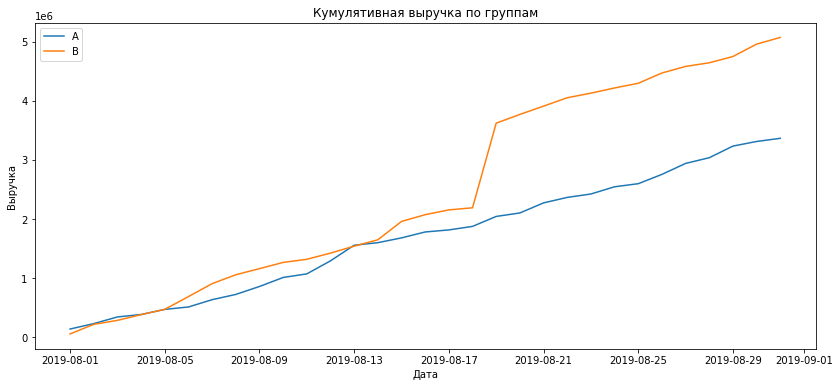

In [19]:
#сохраним данные о датах, выручке и числе заказов в группах A и B в новых переменных и построим график
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#визуализация графика
plt.figure(figsize=(14,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 
#показ графика
plt.show()

Из графика мы видим, что кумулятивная выручка группы В лидирует, но вероятно, дело в аномально больших заказах или всплеске числа заказов в данной группе и делать выводы еще рано.

#### График кумулятивного среднего чека по группам

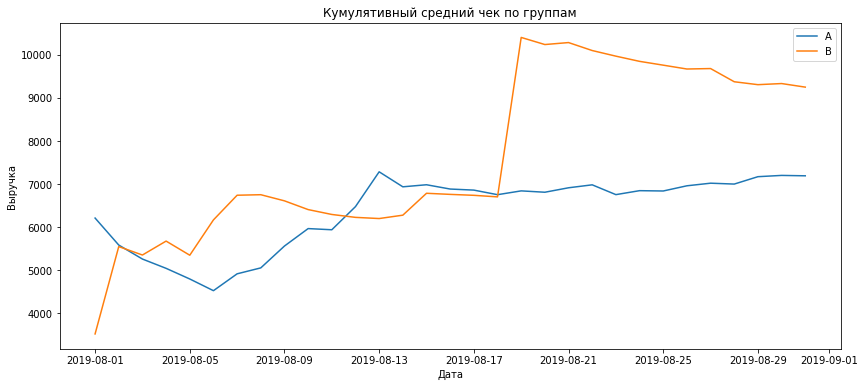

In [20]:
#визуализация графика
plt.figure(figsize=(14,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
#показ графика
plt.show()

По графику кумулятивного среднего чека по группам также наблюдается резкий скачек у группы В, в сравнении с группой А, что подтверждает наличие аномальных данных.

##### График относительного изменения кумулятивного среднего чека группы B к группе A

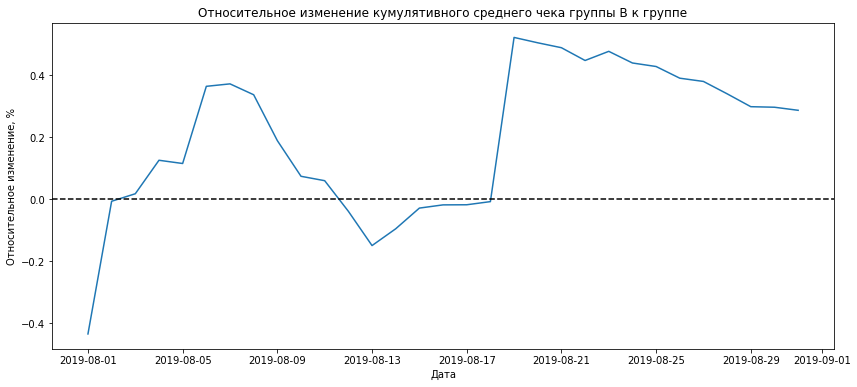

In [21]:
#объединим данные о датах, выручке и числе заказов в группах A и B для построения графика
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

#визуализация графика
plt.figure(figsize=(14,6))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
#показ графика
plt.show()

В нескольких точках графика различия между сегментами резко «скачет». Тут явно присутствуют выбросы.

#### График кумулятивного среднего количества заказов на посетителя по группам

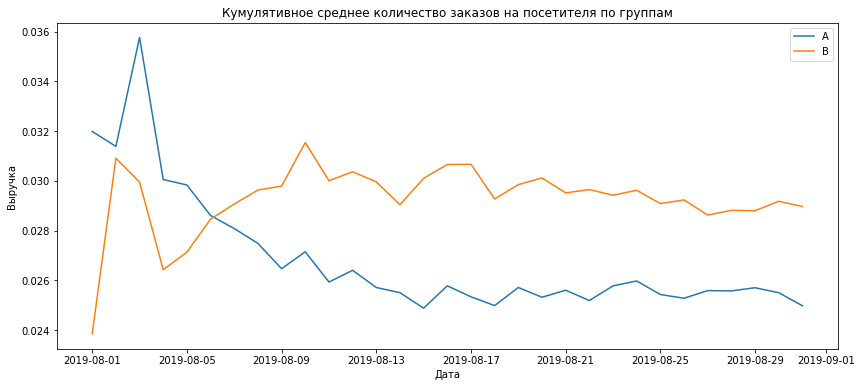

In [22]:
#считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#отделяем данные по группе A и B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#визуализация графика
plt.figure(figsize=(14,6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
#показ графика
plt.show()

В начале теста лидировала группа А, но уже с 5 дня мы наблюдаем спад среднего количества заказов.

##### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

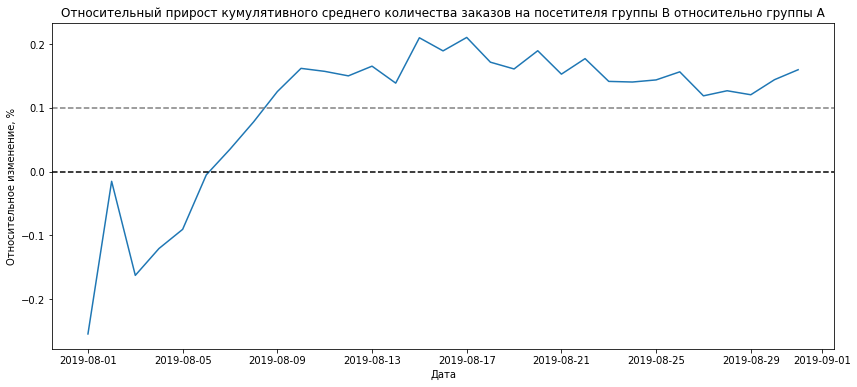

In [23]:

merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

#визуализация графика
plt.figure(figsize=(14,6))
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversion_b']/
         merged_сumulative_сonversions['conversion_a']-1)

plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
#показ графика
plt.show()

График различия конверсии между группами показывает, что результаты группы B лучше группы A. 

9 августа 2019 года у группы В наблюдается прирост в 10%, затем достигает своего пика в 20% и держится на уровне 15% от группы А. 

#### Точечный график количества заказов по пользователям

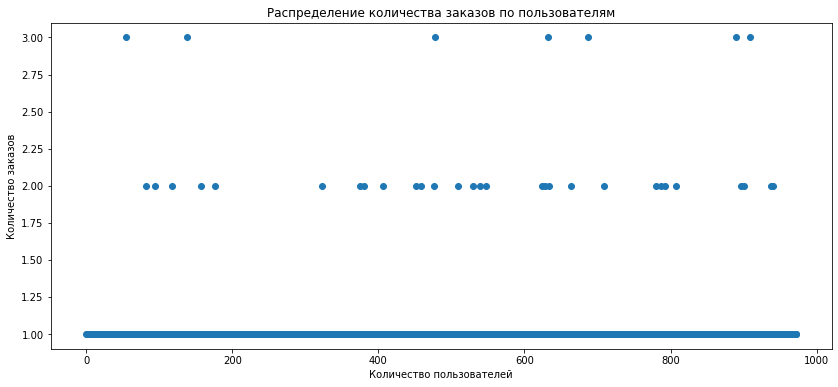

In [24]:
#найдем число заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users.columns = ['visitor_id','orders']
orders_by_users.sort_values(by='orders', ascending=False)
#серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

#визуализация графика
plt.figure(figsize=(14,6))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
#показ графика
plt.show()

Большинство пользователей делали по 1 заказу, количество пользователей, сделавших более двух заказов мало, посмотрим можно ли считать эти данные аномальными, посчитав выборочные перцентили.

##### 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 2 заказов и не более 1% пользователей больше 2 заказов. Разумно выбрать не более 2-х заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Точечный график стоимостей заказов

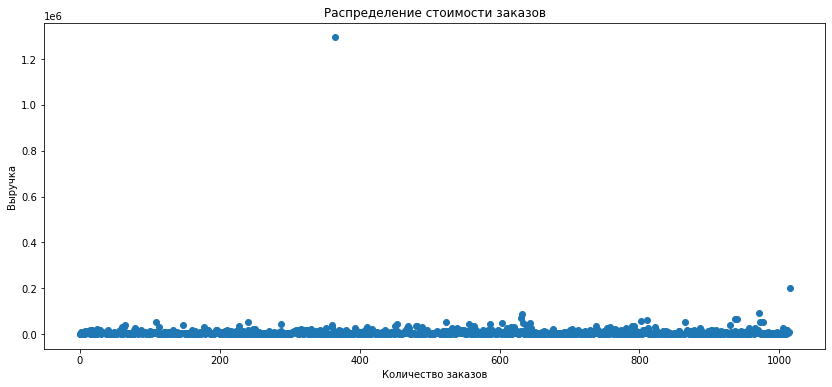

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))

#визуализация графика
plt.figure(figsize=(14,6))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Выручка')
#показ графика
plt.show()

Есть выбросы в районе 200 тыс и 1.2 млн, большая часть стоимости заказов до 50 тыс, найдем выборочные перцентили.

##### 95-й и 99-й перцентили стоимости заказов

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не больше, чем у 5% заказов чек дороже 26 785, и не больше 1% заказов с чеком от 53904. Значит в основном стоимость заказов приходится до 26 785, это и будет граница, свыше которой будут аномальные заказы.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Начнём с подготовки данных.

In [28]:
#количество пользователей в выбранную дату в группе A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}),axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

#количество пользователей в выбранную дату в группе B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [29]:
#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), 
    axis=1).sort_values(by=['date'])
orders_a_cummulative.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),
    axis=1).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [30]:
#объединение всех таблиц
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

- Нулевая: различий в среднем количестве заказов между группами по «сырым» данным нет

- Альтернативная: различия в среднем количестве заказо между группами по «сырым» данным есть

In [31]:
#cоздадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']
#в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

#объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов
#тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(
        data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(
        data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')], axis=0)

In [32]:
#применим критерий mannwhitneyu()
result = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p-value:', result)

#вывод об отвержении или неотвержении нулевой гипотезы
if result < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
#относительное различие в среднем между группами
print('Относительное различие в среднем между группами: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011018084110014696
Отвергаем нулевую гипотезу
Относительное различие в среднем между группами: 0.160


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между сегментами. Сформулируем гипотезы:

- Нулевая гипотеза: различий в среднем чеке между группами по «сырым» нет

- Альтернативная гипотеза: различия в среднем чеке между группами по «сырым» есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.

In [33]:
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value:', result)

#вывод об отвержении или неотвержении нулевой гипотезы
if result < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print('Относительное различие в среднем между группами: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.8294908998149533
Нет оснований отвергнуть нулевую гипотезу
Относительное различие в среднем между группами: 0.287


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 28,7%.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 26 785. 

In [34]:
#срезы пользователей с числом заказов больше 2 и и пользователей, совершивших заказы дороже 26 785
percentile_orders = np.percentile(orders_by_users['orders'], [99][0])
percentile_revenue = np.percentile(orders['revenue'], [95][0])

many_user_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > percentile_orders]['visitor_id'],
     orders_by_users_b[orders_by_users_b['orders'] > percentile_orders]['visitor_id']], axis=0)
expensive_user_orders = orders[orders['revenue'] > percentile_revenue]['visitor_id']
#объединим их в таблице, удалим дубликаты, отсортируем по возрастанию
abnormal_users = (
    pd.concat([many_user_orders, expensive_user_orders], axis=0)
    .drop_duplicates().sort_values()
)
#узнаем, сколько всего аномальных пользователей
abnormal_users.shape[0]

58

In [35]:
#сохраним очищенные данные о заказах
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
            name='orders')], axis=0)

sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],
         pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
               name='orders')], axis=0)

result = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('p-value:', result)

#вывод об отвержении или неотвержении нулевой гипотезы
if result < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

print('Относительное различие в среднем между группами: {0:.3f}'
      .format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value: 0.01235203801772639
Отвергаем нулевую гипотезу
Относительное различие в среднем между группами: 0.182


Результаты по среднему количеству заказов практически не изменились. Сегмент B значительно лучше сегмента A, относительный прирост среднего группы B к конверсии группы A равен 18,2%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [36]:
result = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                            orders[np.logical_and(orders['group'] == 'B', 
                                  np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]
print('p-value:', result)

#вывод об отвержении или неотвержении нулевой гипотезы
if result < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print('Относительное различие в среднем между группами: {0:.3f}'
      .format(orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()- 1))

p-value: 0.6458964038091206
Нет оснований отвергнуть нулевую гипотезу
Относительное различие в среднем между группами: -0.048


Несмотря на то, что показатель p-value и общие выводы практически не изменились, разница между сегментами сократилась с 28,7% до 4,8%. 

Имеющиеся факты:
- Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и имеют тенденцию к росту;
- График различия среднего чека колеблется: он и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.

### Общий вывод

В ходе нашего исследования были выполнены следующие шаги:

1. Загрузка данных и подготовка их к анализу

- В датафреймах hypothesis и orders наименования столбцов приведены к корректному виду
- Изменен тип данных в столбце с датой в датафреймах orders и visitors.
- Данные проверены на отсутствие пропущенных значений и явных дубликатов 

2. Часть 1. Приоритизация гипотез

Применены фреймворки ICE и RICE для приоритизации гипотез:

- Наиболее перспективные гипотезы по ICE: 8, 0 и 7
- Наиболее перспективные гипотезы по RICE: 7, 2 и 0 

Фреймворк RICE учитывает дополнительный параметр reach (охват аудитории), что влияет на изменение приоритизации гипотез, в связи с чем: 

- гипотеза 7 занимает первое место приоритета, потому что ее параметр reach равен 10, она затронет всех пользователей;

- гипотеза 8 понизилась в приоритете и несмотря на высокие показатели impact и confidence, охват у нее самый минимальный из всех гипотез, в отличие от гипотезы 2, которая оказалась на втором месте приоритета после подсчета RICE;
 
- гипотеза 0, занимавшая второе место при использовании фреймворка ICE, с учетом RICE заняла третье место приоритетности.

3. Часть 2. Анализ A/B-теста

Перед началом анализа были удалены пользователи, которые попали в обе группы теста.

Построив графики кумулятивной выручки и среднего чека по группам, мы можем сделать вывод о том, что у группы В показатели лучше, чем у группы А, но причиной тому стало присутствие в данных аномальных значений, что подтверждается графиком относительного изменения кумулятивного среднего чека.

Исходя из графиков кумулятивного среднего количества заказов, конверсия группы В выше, начиная с 5 дня, что подтверждает график относительного прироста между группами, в котором прирост держится на уровне 15% от группы А.

С помощью точечных графиков и вычисления перцентилей удалось отсеять 58 аномальных пользователей, а именно:

- пользователей кто совершил более 2 заказов 
- пользователей, кто совершил заказ дороже 26 785

По результатам статистического анализа установили:

- есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий. Относительный прирост среднего группы B к конверсии группы A равен 16% по «сырым» данным и 18,2% после фильтрации.
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Разница между сегментами сократилась с 28,7% до 4,8%

***Рекомендации:***

1. Приоритет гипотез 7, 2 и 0:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.	


2. По результатам A/B-теста рекомендуется остановить тест и зафиксировать победу группы В.